In [55]:
%matplotlib inline

import pandas as pd
import statistics
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy

import warnings
warnings.filterwarnings('ignore')


In [4]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

#load the data
data = pd.read_csv('../QOG_dataset.csv')

# convert to numeric format
data["epi_ehair"]     = pd.to_numeric(data["epi_ehair"],     errors='coerce')
data["epi_ehwater"]   = pd.to_numeric(data["epi_ehwater"],   errors='coerce')
data["imf_gdpppps"]   = pd.to_numeric(data["imf_gdpppps"],   errors='coerce')
data["wdi_hepcusd11"] = pd.to_numeric(data["wdi_hepcusd11"], errors='coerce')
data["wdi_smokfem"]   = pd.to_numeric(data["wdi_smokfem"],   errors='coerce')
data["wdi_smokmal"]   = pd.to_numeric(data["wdi_smokmal"],   errors='coerce')
data["wdi_tubcdr"]    = pd.to_numeric(data["wdi_tubcdr"],    errors='coerce')
data["wdi_tubinc"]    = pd.to_numeric(data["wdi_tubinc"],    errors='coerce')
data["wdi_tubtsr"]    = pd.to_numeric(data["wdi_tubtsr"],    errors='coerce')
data["wef_bit"]       = pd.to_numeric(data["wef_bit"],       errors='coerce')

# listwise deletion of missing values
sub1 = data[['epi_ehair', 'epi_ehwater', 'imf_gdpppps', 'wdi_hepcusd11', 'wdi_smokfem', 
             'wdi_smokmal', 'wdi_tubcdr', 'wdi_tubinc', 'wdi_tubtsr', 'wef_bit']].dropna()

print(len(sub1))

109


Describing the variable:

count   109.00
mean     78.97
std      18.73
min      14.30
25%      68.90
50%      81.67
75%      95.34
max     100.00
Name: epi_ehair, dtype: float64


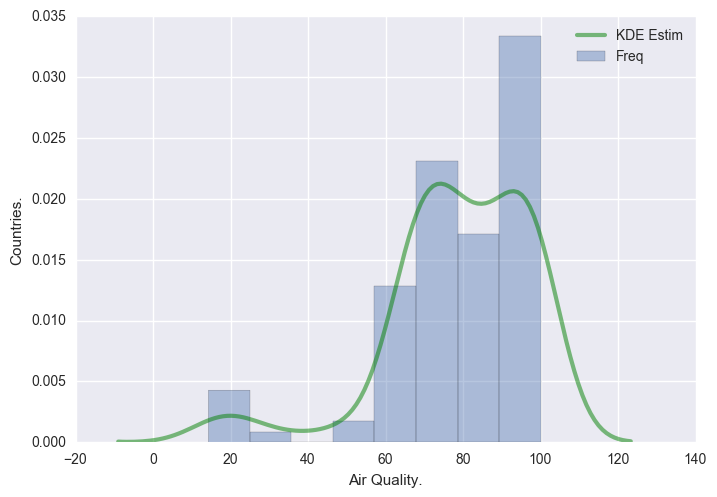

In [5]:
# Univariate histogram
sb.distplot(sub1["epi_ehair"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Air Quality.')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["epi_ehair"].describe())

Describing the variable:

count   109.00
mean     55.56
std      33.05
min       2.88
25%      26.24
50%      55.91
75%      88.69
max     100.00
Name: epi_ehwater, dtype: float64


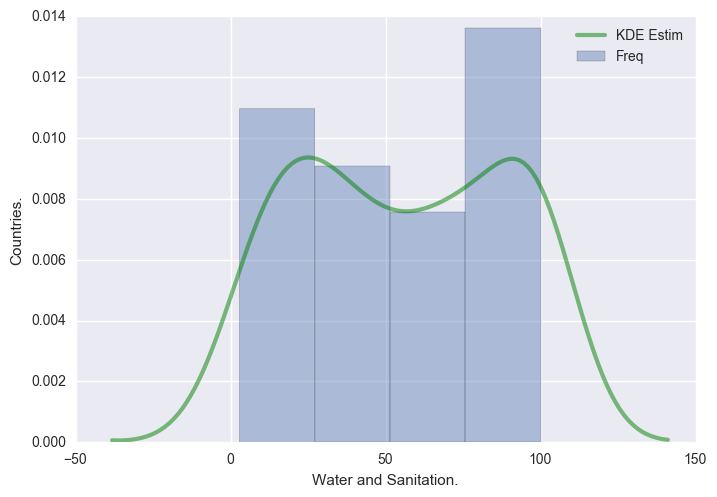

In [6]:
sb.distplot(sub1["epi_ehwater"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Water and Sanitation.')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["epi_ehwater"].describe())

Describing the variable:

count   109.00
mean      0.81
std       2.44
min       0.00
25%       0.03
50%       0.12
75%       0.51
max      19.57
Name: imf_gdpppps, dtype: float64


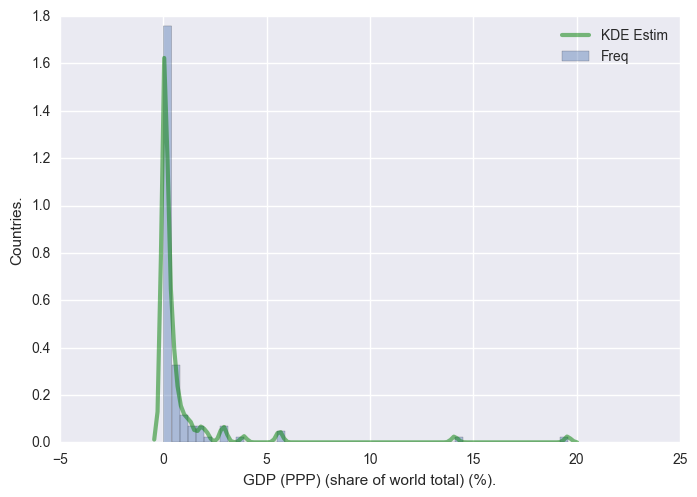

In [7]:
sb.distplot(sub1["imf_gdpppps"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('GDP (PPP) (share of world total) (%).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["imf_gdpppps"].describe())

Describing the variable:

count    109.00
mean    1424.78
std     1626.97
min       34.81
25%      270.53
50%      878.40
75%     1677.60
max     8845.18
Name: wdi_hepcusd11, dtype: float64


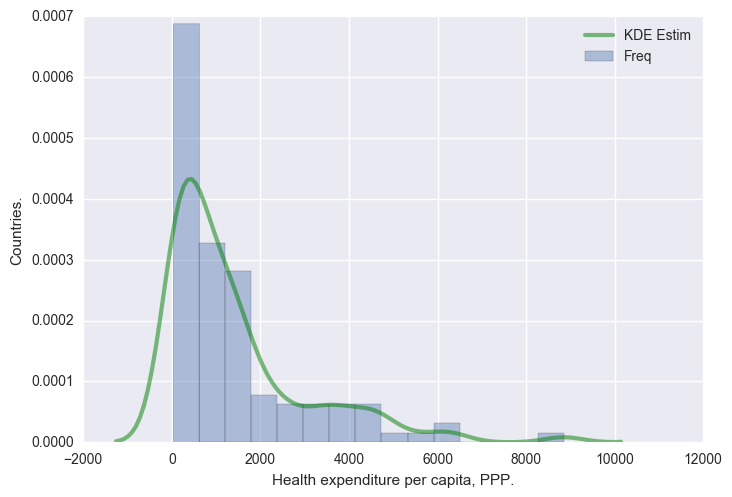

In [8]:
sb.distplot(sub1["wdi_hepcusd11"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Health expenditure per capita, PPP.')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_hepcusd11"].describe())

Describing the variable:

count   109.00
mean     11.57
std      10.22
min       0.40
25%       3.00
50%       7.70
75%      20.10
max      39.80
Name: wdi_smokfem, dtype: float64


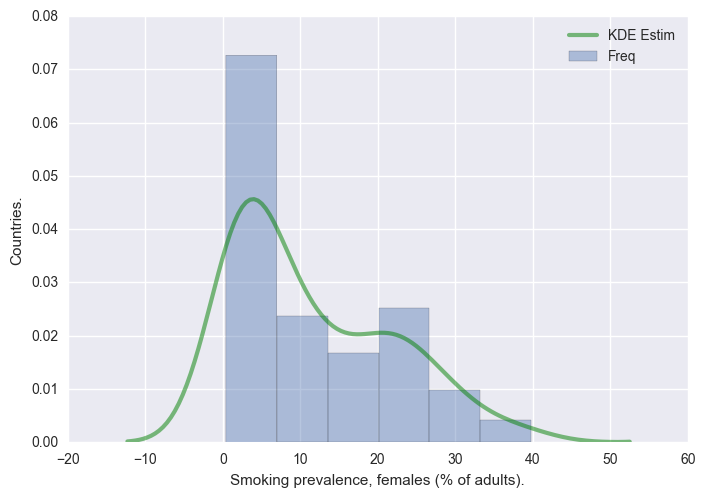

In [9]:
sb.distplot(sub1["wdi_smokfem"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Smoking prevalence, females (% of adults).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_smokfem"].describe())

Describing the variable:

count   109.00
mean     34.44
std      12.83
min       8.90
25%      23.60
50%      33.60
75%      43.70
max      71.80
Name: wdi_smokmal, dtype: float64


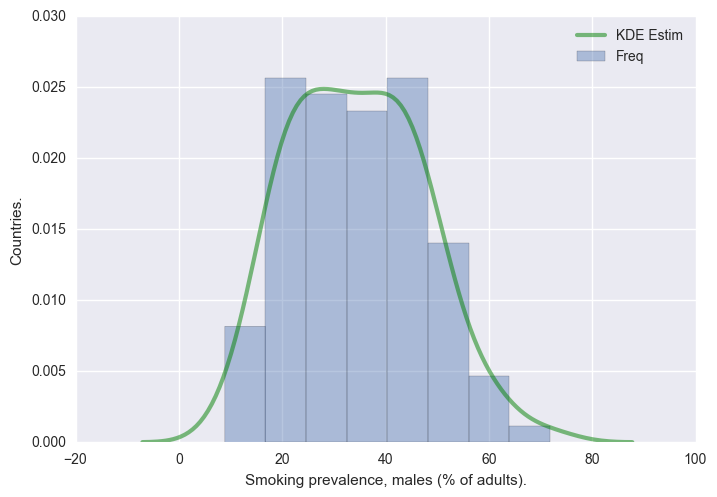

In [10]:
sb.distplot(sub1["wdi_smokmal"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Smoking prevalence, males (% of adults).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_smokmal"].describe())

Describing the variable:

count   109.00
mean     75.28
std      17.89
min      16.00
25%      65.00
50%      80.00
75%      87.00
max     120.00
Name: wdi_tubcdr, dtype: float64


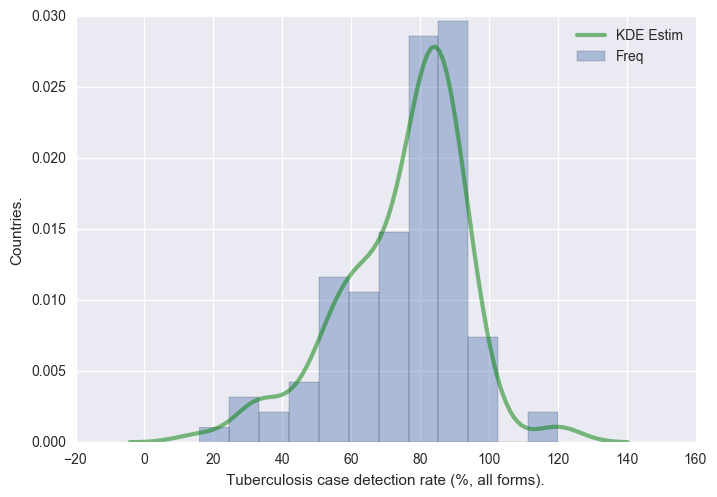

In [11]:
sb.distplot(sub1["wdi_tubcdr"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Tuberculosis case detection rate (%, all forms).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_tubcdr"].describe())

Describing the variable:

count    109.00
mean     128.83
std      195.29
min        1.60
25%       15.00
50%       51.00
75%      161.00
max     1042.00
Name: wdi_tubinc, dtype: float64


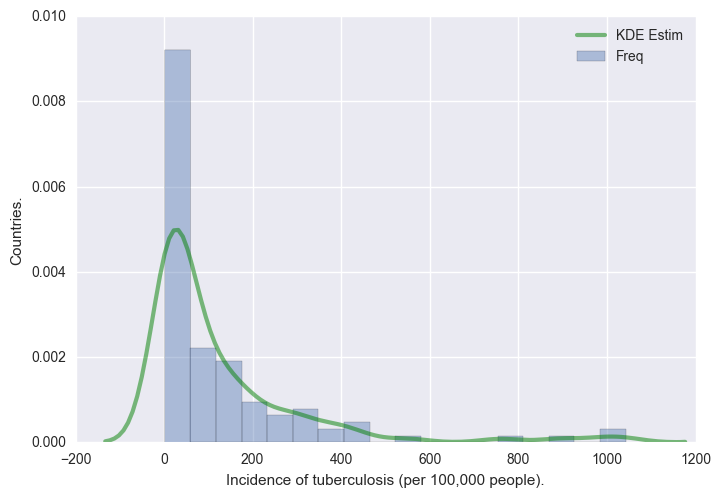

In [12]:
sb.distplot(sub1["wdi_tubinc"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Incidence of tuberculosis (per 100,000 people).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_tubinc"].describe())

Describing the variable:

count   109.00
mean     78.29
std      15.64
min       0.00
25%      74.00
50%      82.00
75%      87.00
max     100.00
Name: wdi_tubtsr, dtype: float64


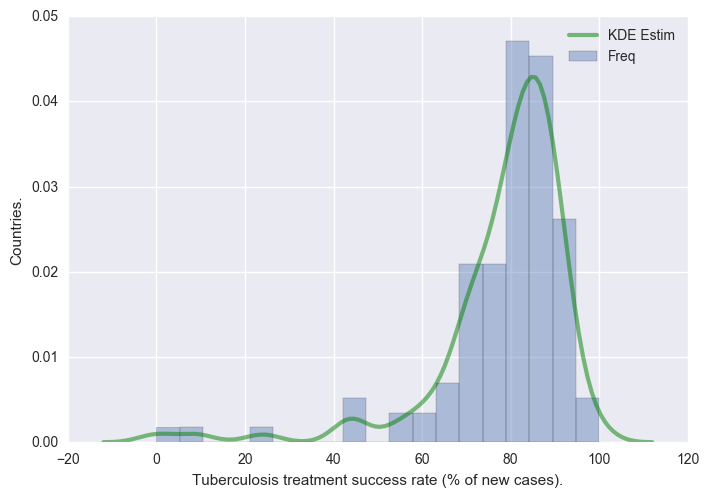

In [13]:
sb.distplot(sub1["wdi_tubtsr"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Tuberculosis treatment success rate (% of new cases).')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wdi_tubtsr"].describe())

Describing the variable:

count   109.00
mean      5.24
std       1.05
min       2.27
25%       4.45
50%       5.39
75%       6.09
max       6.84
Name: wef_bit, dtype: float64


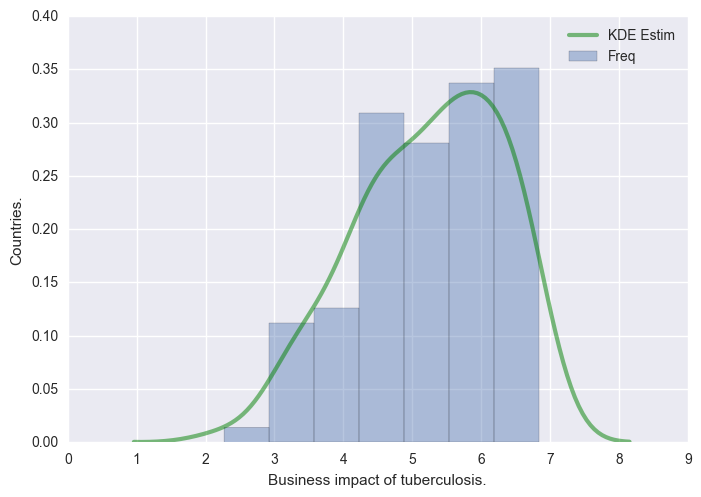

In [14]:
sb.distplot(sub1["wef_bit"], #kde=False, 
            kde_kws={"color":"g","lw":3,"label":"KDE Estim","alpha":0.5},
            hist_kws={"alpha":0.4,"label":"Freq"})
plt.xlabel('Business impact of tuberculosis.')
plt.ylabel('Countries.')
#plt.title('')

print('Describing the variable:\n')
print(sub1["wef_bit"].describe())

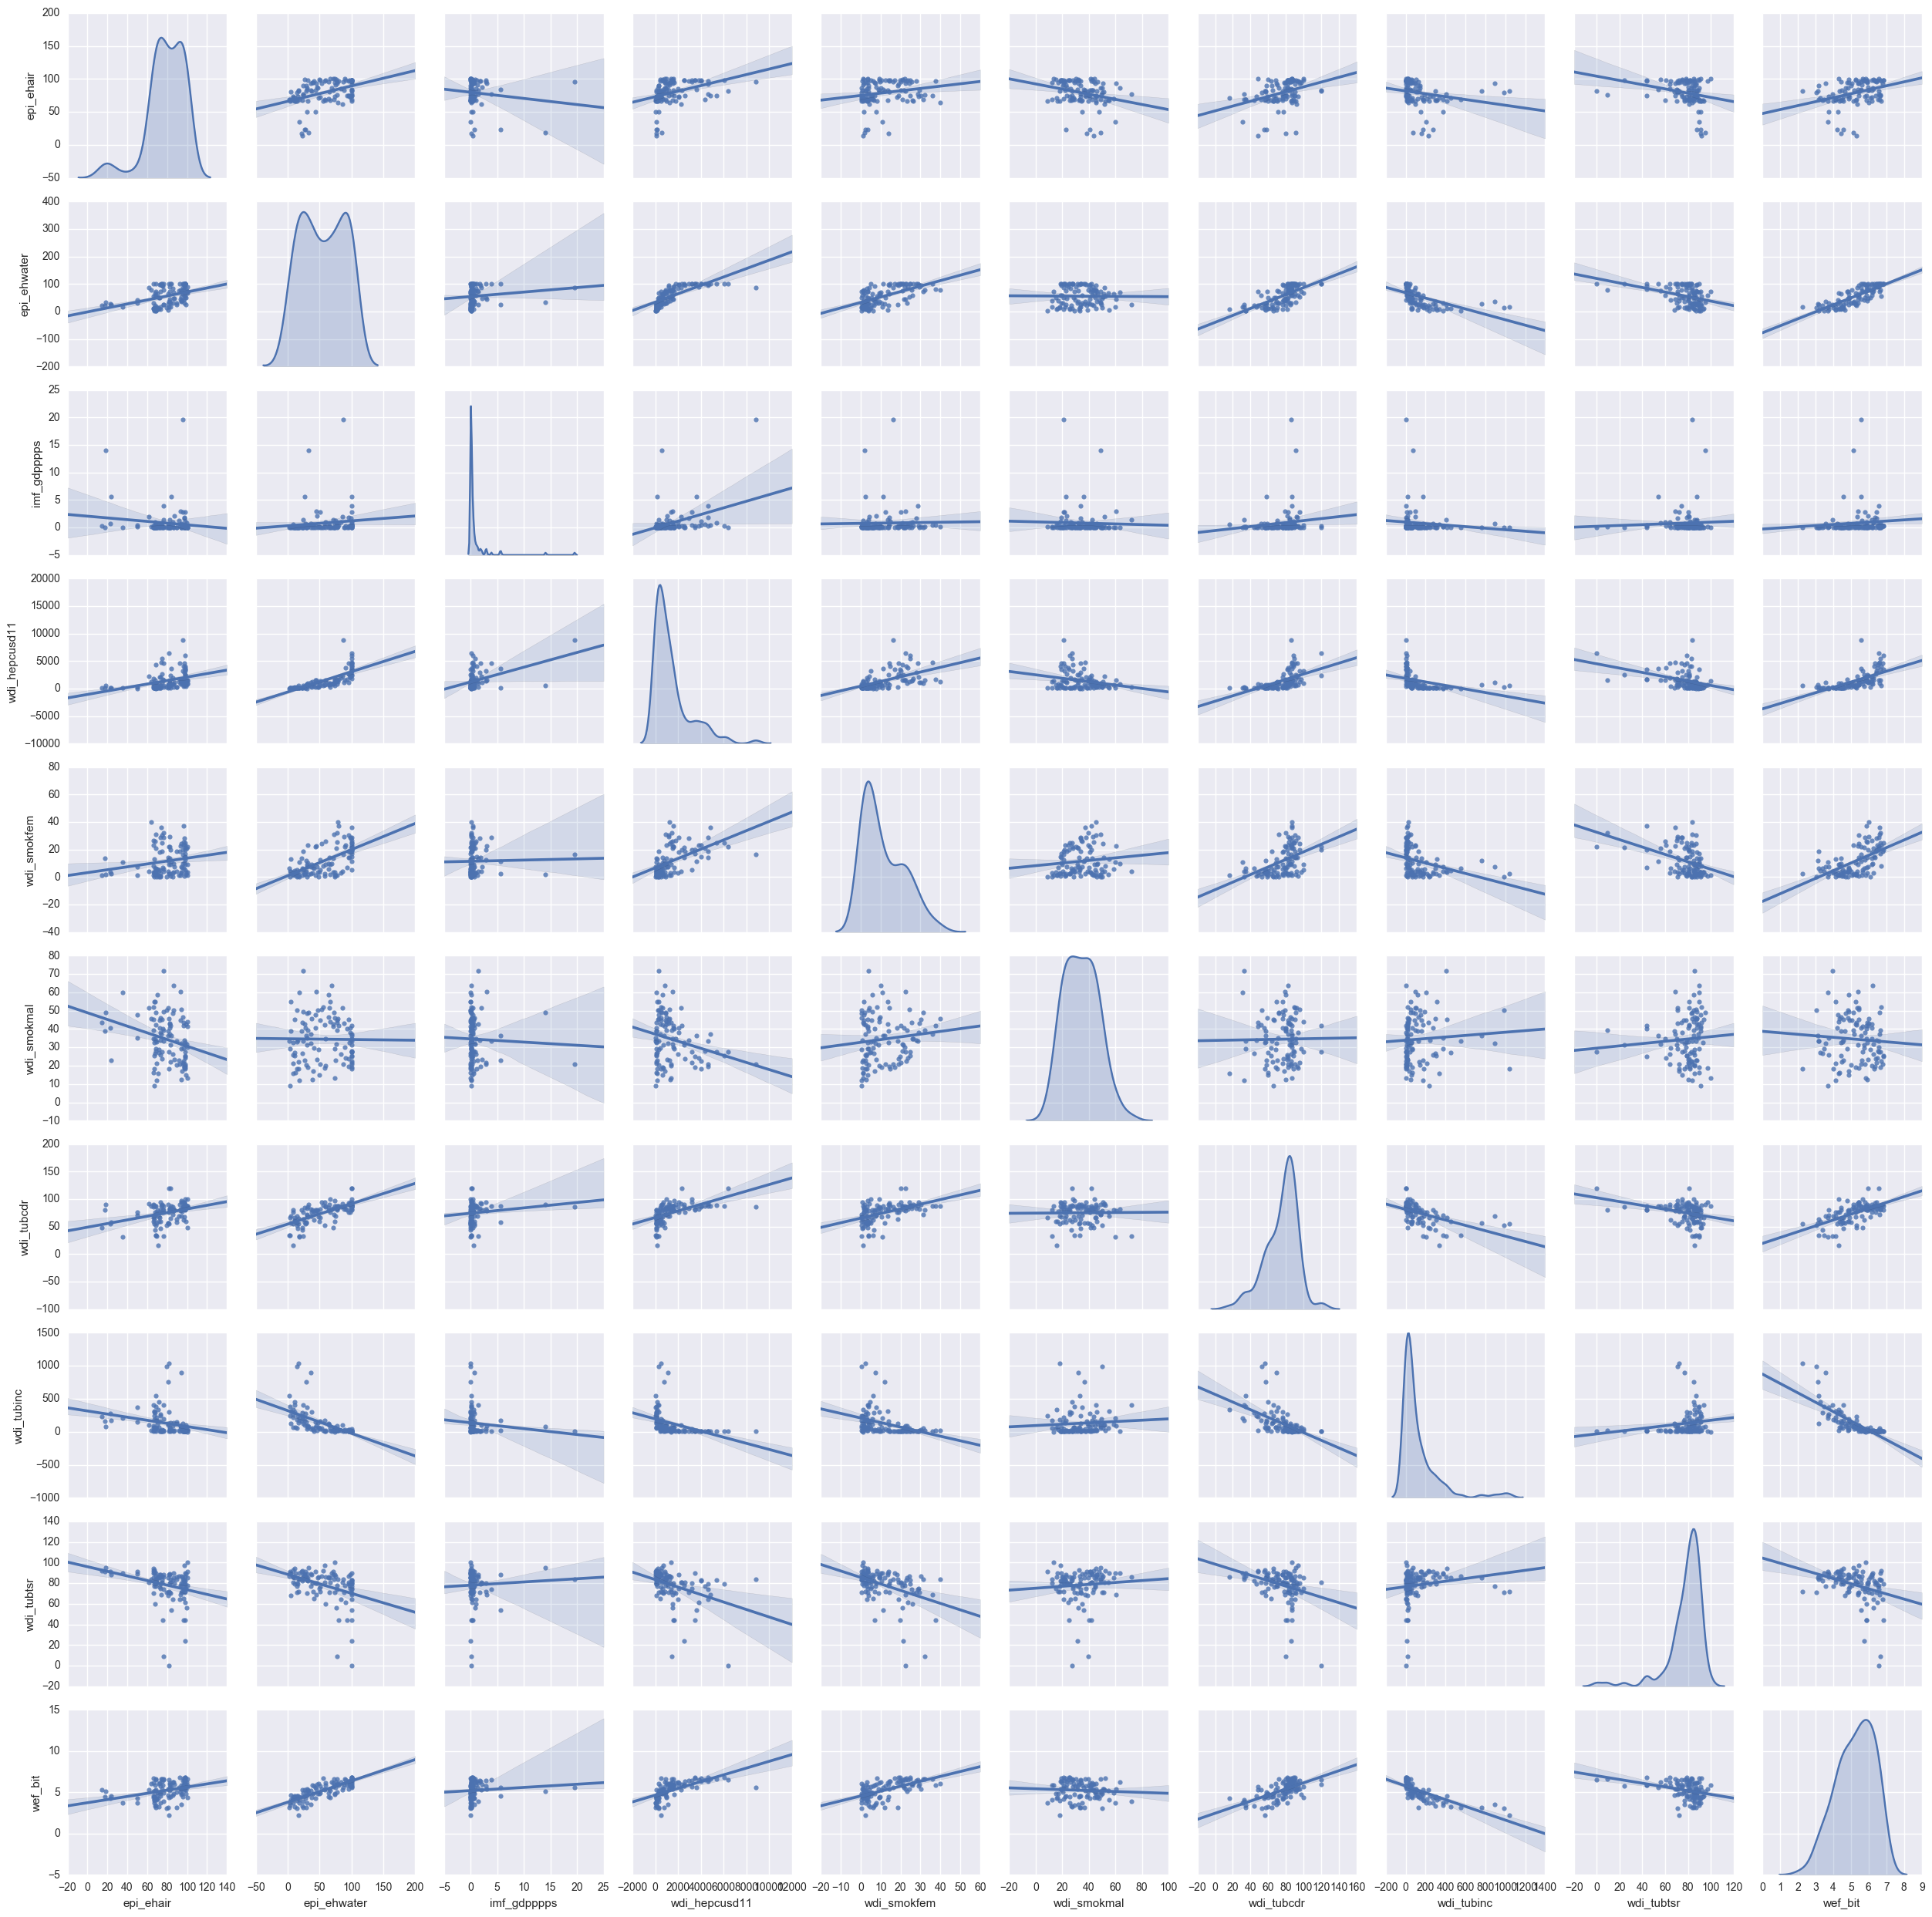

In [15]:
g = sb.pairplot(sub1, kind='reg', diag_kind="kde", diag_kws=dict(shade=True))

In [49]:
def changeLabel(replacements, g, number):
    for j in range(number):
        xlabel = g.axes[0][j].get_xlabel()
        ylabel = g.axes[0][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[0][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[0][j].set_ylabel(replacements[ylabel])


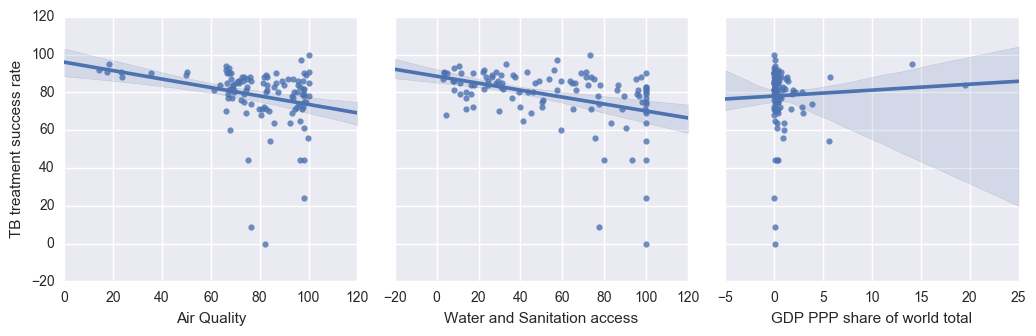

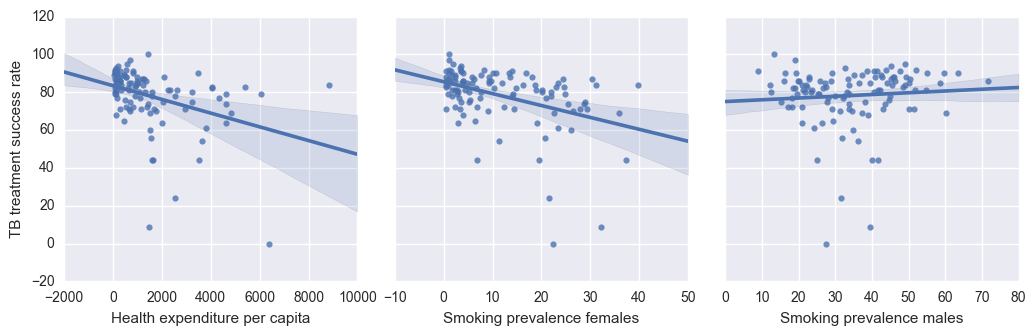

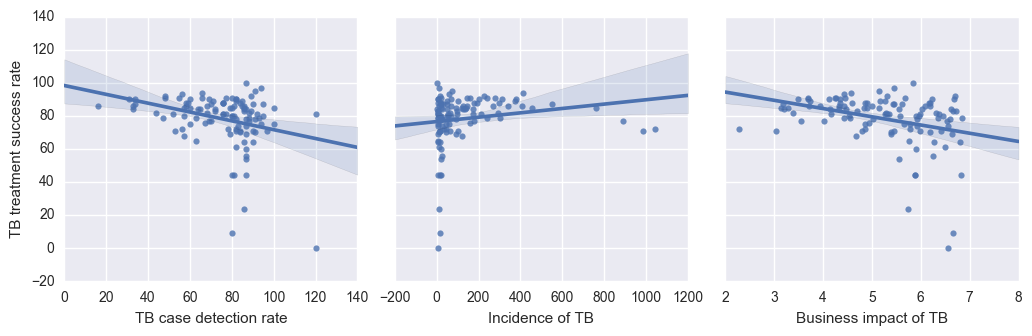

In [53]:
replacements = {'epi_ehair' : 'Air Quality',       
                'epi_ehwater': 'Water and Sanitation access', 
                'imf_gdpppps': 'GDP PPP share of world total', 
                'wdi_hepcusd11': 'Health expenditure per capita', 
                'wdi_smokfem' : 'Smoking prevalence females',
                'wdi_smokmal' : 'Smoking prevalence males', 
                'wdi_tubcdr' : 'TB case detection rate', 
                'wdi_tubinc' : 'Incidence of TB', 
                'wdi_tubtsr' : 'TB treatment success rate',
                'wef_bit' : 'Business impact of TB'}

g = sb.pairplot(sub1, kind='reg', diag_kind="kde", diag_kws=dict(shade=True), y_vars=["wdi_tubtsr"], 
                x_vars=['epi_ehair', 'epi_ehwater', 'imf_gdpppps'], size=3.5)

changeLabel(replacements, g, 3)

g = sb.pairplot(sub1, kind='reg', diag_kind="kde", diag_kws=dict(shade=True), y_vars=["wdi_tubtsr"], 
                x_vars=['wdi_hepcusd11', 'wdi_smokfem', 'wdi_smokmal'], size=3.5)

changeLabel(replacements, g, 3)

g = sb.pairplot(sub1, kind='reg', diag_kind="kde", diag_kws=dict(shade=True), y_vars=["wdi_tubtsr"], 
                x_vars=['wdi_tubcdr', 'wdi_tubinc', 'wef_bit'], size=3.5)

changeLabel(replacements, g, 3)




In [58]:
print(scipy.stats.pearsonr(sub1['epi_ehair'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['epi_ehwater'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['imf_gdpppps'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wdi_hepcusd11'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wdi_smokfem'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wdi_smokmal'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wdi_tubcdr'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wdi_tubinc'], sub1['wdi_tubtsr']))
print(scipy.stats.pearsonr(sub1['wef_bit'], sub1['wdi_tubtsr']))

(-0.26775734387739497, 0.004880316666226985)
(-0.38837973505855233, 3.0048949670515808e-05)
(0.048703135297842474, 0.61502605324776249)
(-0.37709193833031518, 5.3035913861558187e-05)
(-0.41091870471957181, 9.0657348408192338e-06)
(0.076244263825150788, 0.43070589358626765)
(-0.30539314280010404, 0.0012415953936624122)
(0.16488836001718399, 0.086641377681448722)
(-0.33497227651746697, 0.0003703916727759481)


In [115]:
from sklearn.linear_model import LassoLarsCV

# standardize predictors to have mean=0 and sd=1
targets = sub1['wdi_tubtsr']

predictors = sub1[['epi_ehair', 'epi_ehwater', 'imf_gdpppps', 'wdi_hepcusd11', 'wdi_smokfem', 
             'wdi_smokmal', 'wdi_tubcdr', 'wdi_tubinc', 'wef_bit']].copy()

for i in predictors:
    predictors[i] = preprocessing.scale(predictors[i].astype('float64'))

# split data into train and test sets - Train = 70%, Test = 30%
#pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets,
#                                                              test_size=.3, random_state=123)
# This will not be done because the dataset have low samples


# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False, fit_intercept=True).fit(predictors, targets)

print('Intercept: \f', model.intercept_)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

Intercept:  78.2935779817


{'epi_ehair': -0.95439985843065855,
 'epi_ehwater': -0.94430800498374723,
 'imf_gdpppps': 0.0,
 'wdi_hepcusd11': -1.4115078872351181,
 'wdi_smokfem': -3.1768505607407929,
 'wdi_smokmal': 0.0,
 'wdi_tubcdr': 0.0,
 'wdi_tubinc': 0.0,
 'wef_bit': 0.0}

In [118]:
len(model.cv_mse_path_)

101

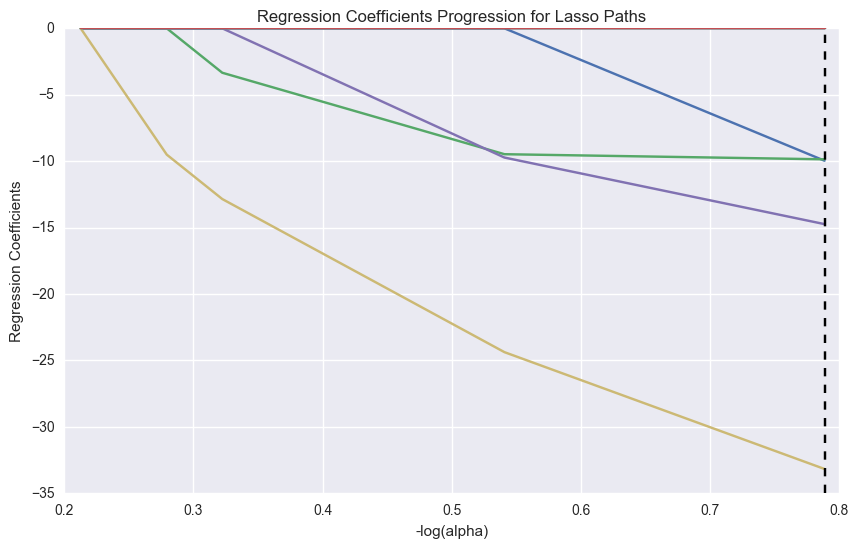

In [132]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
#ax = plt.gca()
plt.figure(figsize=(10,6))
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

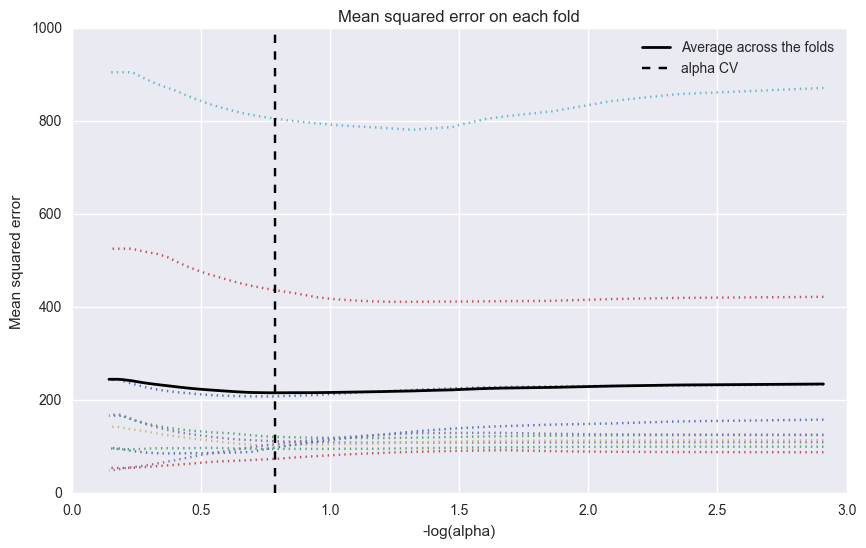

In [133]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure(figsize=(10,6))
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')


In [85]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
analysis_error = mean_squared_error(targets, model.predict(predictors))

print ('Data MSE')
print(analysis_error)



Data MSE
193.105108127


In [83]:
# R-square from training and test data
rsquared=model.score(predictors,targets)
print ('Data R-square')
print(rsquared)

Data R-square
0.20345237388


In [140]:
import statsmodels.formula.api as smf

reg1 = smf.ols('wdi_tubtsr ~ epi_ehair + '+
               'epi_ehwater + '+
               'imf_gdpppps + '+
               'wdi_hepcusd11 + '+
               'wdi_smokfem + '+
               'wdi_smokmal + '+
               'wdi_tubcdr + '+
               'wdi_tubinc + '+
               'wef_bit', data=sub1).fit()
print (reg1.summary())


                            OLS Regression Results                            
Dep. Variable:             wdi_tubtsr   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.566
Date:                Thu, 08 Dec 2016   Prob (F-statistic):           0.000715
Time:                        00:27:08   Log-Likelihood:                -438.61
No. Observations:                 109   AIC:                             897.2
Df Residuals:                      99   BIC:                             924.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        99.7452     17.155      5.814